c(x, t) = M/A * 1 / (2*sqrt(pi*D)) * x / t^(3/2) * exp(- (ut - x) ^ 2 / (4*D*t))

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot
from scipy import constants as const
import pint

# Set up units
si = pint.UnitRegistry()
si.setup_matplotlib()

In [27]:
# Define the function to plot
def concentration(x, t, M, A, D, u):
    """Calculate concentration based on the given formula.
    
    Parameters:
    x: distance [m]
    t: time [s]
    M: mass [kg]
    A: area [m^2]
    D: diffusion coefficient [m^2/s]
    u: velocity [m/s]
    """
    return (M/A) * (1/(2*np.sqrt(np.pi*D))) * (x/t**(3/2)) * np.exp(-((u*t - x)**2)/(4*D*t))

# Define parameters with units
M = 1.0 * si.kg  # mass
A = 1.0 * si.m**2  # area
D = 0.1 * si.m**2/si.s  # diffusion coefficient
u = 0.5 * si.m/si.s  # velocity

In [28]:
def plot_concentration_vs_time(fig):
    distances = np.linspace(20, 30, 10) * si.m
    t_range = np.linspace(1, 100, 500) * si.s  # Avoid t=0 to prevent division by zero
    
    ax = fig.gca()
    for x in distances:
        c = concentration(x, t_range, M, A, D, u)
        ax.plot(t_range, c, label=f'x = {x:.0f}')
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Concentration (kg/m³)')
    ax.set_title('Concentration vs Time for Different Distances')
    ax.legend()
    ax.grid(True)

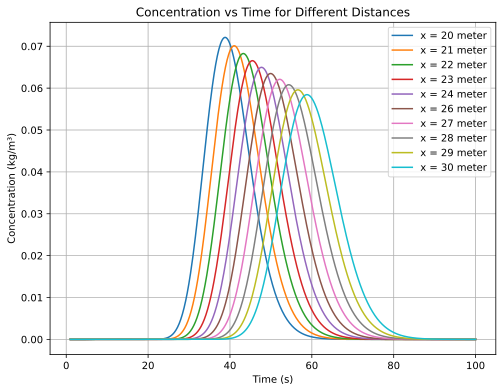

In [29]:
# Create and show the second plot (concentration vs time)
fig2 = plt.figure(figsize=(8, 6))
plot_concentration_vs_time(fig2)
show_plot(fig=fig2)